# 01 Cleaning

1. Imports and display options
2. Relevance checks
3. Consistency checks
4. Outlier checks
5. Missing values checks
6. Duplicate values checks
7. Questions check
8. Export

## 1. Imports and display options

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

In [2]:
#Creating a path to the root directory for this project
path = r'C:\Users\theva\OneDrive\Documents\Data Analyses\BRFSS - Diet and Nutrition'

<div class='alert alert-block alert-info'>
Note: Orginal data obtained from CDC.gov on 12/14/2022. https://chronicdata.cdc.gov/Behavioral-Risk-Factors/Behavioral-Risk-Factor-Surveillance-System-BRFSS-P/dttw-5yxu
    </div>

In [3]:
#Importing products.csv to df_prods
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Behavioral_Risk_Factor_Surveillance_System__BRFSS__Prevalence_Data__2011_to_present_.csv'))

C:\Users\theva\AppData\Local\Temp\ipykernel_12960\3143779256.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Behavioral_Risk_Factor_Surveillance_System__BRFSS__Prevalence_Data__2011_to_present_.csv'))


In [4]:
df.shape

(2289902, 27)

In [5]:
pd.set_option('display.max_rows', 500)

## 2. Relevance checks

### Creating a new dataframe with only necessary columns

In [6]:
#creating dataframe with rows needed for the analysis as noted in Project Log from Preliminiary Explorations
df_thin = df[['Year', 'Sample_Size', 'Data_value', 'ClassId', 'TopicId', 'LocationID', 'BreakoutID', 'BreakOutCategoryID', 'QuestionID', 'ResponseID']]

In [7]:
#Checking shape
df_thin.shape

(2289902, 10)

In [8]:
#Checking head
df_thin.head(30)

,Year,Sample_Size,Data_value,ClassId,TopicId,LocationID,BreakoutID,BreakOutCategoryID,QuestionID,ResponseID
0,2012,296,13.1,CLASS05,Topic02,66,BO1,CAT1,AGE,RESP014
1,2012,272,21.2,CLASS05,Topic02,66,SEX2,CAT2,AGE,RESP012
2,2020,356,19.7,CLASS03,TOPIC17,1,EDUCA4,CAT5,ADDEPEV3,RESP046
3,2020,32,0.8,CLASS03,TOPIC18,1,RACE01,CAT4,DIABETE4,RESP051
4,2020,92,1.5,CLASS03,TOPIC18,1,BO1,CAT1,DIABETE4,RESP052
5,2013,69,24.5,CLASS08,Topic41,66,AGE01,CAT3,GENHLTH,RESP056
6,2013,48,7.8,CLASS05,Topic38,66,EDUCA2,CAT5,MARITAL,RESP038
7,2013,183,20.4,CLASS05,Topic02,72,EDUCA3,CAT5,AGE,RESP011
8,2020,25,10.0,CLASS04,TOPIC08,1,INCOME1,CAT6,_RFBLDS4,RESP190
9,2011,29,18.5,CLASS05,Topic02,66,RACE3,CAT4,AGE,RESP013


In [9]:
#checking tail
df_thin.tail(30)

,Year,Sample_Size,Data_value,ClassId,TopicId,LocationID,BreakoutID,BreakOutCategoryID,QuestionID,ResponseID
2289872,2021,186,18.1,CLASS05,TOPIC21,78,SEX1,CAT2,EDUCA,RESP024
2289873,2021,0,NaN,CLASS05,TOPIC02,72,RACE04,CAT4,AGE,RESP010
2289874,2021,5,NaN,CLASS03,TOPIC10,78,RACE08,CAT4,CVDSTRK3,RESP046
2289875,2021,89,51.9,CLASS05,TOPIC21,78,INCOME06,CAT6,EDUCA,RESP024
2289876,2021,57,17.1,CLASS08,TOPIC41,78,RACE08,CAT4,GENHLTH,RESP057
2289877,2021,4,NaN,CLASS05,TOPIC39,72,EDUCA2,CAT5,_CHLDCNT,RESP091
2289878,2021,21,5.5,CLASS05,TOPIC39,72,EDUCA1,CAT5,_CHLDCNT,RESP093
2289879,2021,8,NaN,CLASS06,TOPIC27,72,RACE06,CAT4,_FRTLT1A,RESP078
2289880,2021,0,NaN,CLASS02,TOPIC11,72,RACE04,CAT4,_CHOLCH3,RESP072
2289881,2021,988,65.9,CLASS15,TOPIC23,72,EDUCA4,CAT5,_TOTINDA,RESP046


<div class='alert alert-block alert-info'>
Note: New dataframe passes checks. 17 rows dropped.
    </div>

### Removing unnecessary classes
Some classes of questions will not be necessary for the analysis. A list of necessary classes was noted in BRFSS 2011-2021 Class Evaluation.docx. A new dataframe will be created from df_thin with only these classes.

<div class='alert alert-block alert-warning'>
Classes to keep:
    <h4>Class (Class ID)</h4> 
Alcohol Consumption (CLASS01)</br>
Days of Poor Health (CLASS20)</br>
Demographics (CLASS05)</br>
E-Cigarette Use (CLASS19)</br>
Fruits and Vegetables (CLASS06)</br>
Health Care Access/Coverage  (CLASS07)</br>
Health Status (CLASS08)</br>
Hypertension Awareness (CLASS10)</br>
Immunization (CLASS11)</br>
Injury (CLASS12)</br>
Overweight and Obesity (CLASS14)</br>
Physical Activity (CLASS15)</br>
Tobacco Use (CLASS17)
</div>

In [10]:
#creating new data from from df_thin with classIDs noted above
df_short = df_thin.loc[(df_thin['ClassId'] == 'CLASS01') | (df_thin['ClassId'] == 'CLASS20') | (df_thin['ClassId'] == 'CLASS05') | (df_thin['ClassId'] == 'CLASS19') | (df_thin['ClassId'] == 'CLASS06') | (df_thin['ClassId'] == 'CLASS07') | (df_thin['ClassId'] == 'CLASS08') | (df_thin['ClassId'] == 'CLASS10') | (df_thin['ClassId'] == 'CLASS11') | (df_thin['ClassId'] == 'CLASS12') | (df_thin['ClassId'] == 'CLASS14') | (df_thin['ClassId'] == 'CLASS15') | (df_thin['ClassId'] == 'CLASS17')]

In [11]:
df_short.shape

(1622866, 10)

In [12]:
#Checking head
df_short.head(30)

,Year,Sample_Size,Data_value,ClassId,TopicId,LocationID,BreakoutID,BreakOutCategoryID,QuestionID,ResponseID
0,2012,296,13.1,CLASS05,Topic02,66,BO1,CAT1,AGE,RESP014
1,2012,272,21.2,CLASS05,Topic02,66,SEX2,CAT2,AGE,RESP012
5,2013,69,24.5,CLASS08,Topic41,66,AGE01,CAT3,GENHLTH,RESP056
6,2013,48,7.8,CLASS05,Topic38,66,EDUCA2,CAT5,MARITAL,RESP038
7,2013,183,20.4,CLASS05,Topic02,72,EDUCA3,CAT5,AGE,RESP011
9,2011,29,18.5,CLASS05,Topic02,66,RACE3,CAT4,AGE,RESP013
10,2011,19,11.0,CLASS05,Topic22,66,AGE09,CAT3,EMPLOY,RESP029
11,2019,"1,235",76.5,CLASS07,TOPIC36,20,AGE04,CAT3,CHECKUP1,RESP063
12,2020,92,2.0,CLASS05,TOPIC22,1,BO1,CAT1,EMPLOY1,RESP028
13,2020,52,1.7,CLASS05,TOPIC22,1,SEX2,CAT2,EMPLOY1,RESP028


In [13]:
#checking tail
df_short.tail(30)

,Year,Sample_Size,Data_value,ClassId,TopicId,LocationID,BreakoutID,BreakOutCategoryID,QuestionID,ResponseID
2289863,2021,125,17.4,CLASS07,TOPIC29,78,RACE02,CAT4,_HLTHPLN,RESP234
2289864,2021,0,NaN,CLASS05,TOPIC49,72,RACE07,CAT4,RENTHOM1,RESP003
2289865,2021,143,10.3,CLASS05,TOPIC21,78,AGE09,CAT3,EDUCA,RESP024
2289867,2021,29,NaN,CLASS08,TOPIC41,78,INCOME01,CAT6,GENHLTH,RESP059
2289868,2021,"3,372",83.9,CLASS19,TOPIC67,72,BO1,CAT1,ECIGNOW1,RESP218
2289870,2021,176,54.9,CLASS01,TOPIC03,72,INCOME05,CAT6,DRNKANY5,RESP046
2289871,2021,360,92.0,CLASS17,TOPIC54,66,INCOME05,CAT6,USENOW3,RESP081
2289872,2021,186,18.1,CLASS05,TOPIC21,78,SEX1,CAT2,EDUCA,RESP024
2289873,2021,0,NaN,CLASS05,TOPIC02,72,RACE04,CAT4,AGE,RESP010
2289875,2021,89,51.9,CLASS05,TOPIC21,78,INCOME06,CAT6,EDUCA,RESP024


In [14]:
#checking that only desired Classes exist in new data frame
df_short['ClassId'].value_counts()

CLASS05    807571
CLASS07    179418
CLASS17    124422
CLASS08    102514
CLASS01     87881
CLASS15     68632
CLASS11     64091
CLASS14     58538
CLASS12     35479
CLASS06     27284
CLASS19     25632
CLASS20     25320
CLASS10     16084
Name: ClassId, dtype: int64

<div class='alert alert-block alert-info'>
Note: New dataframe passes checks. 667,036 rows dropped.
</div>

## 3. Consistency checks

### Standardizing column names

<div class='alert alert-block alert-warning'>
<h4> Old name : New name</h4>
Year : year</br>
Sample_Size : sample_size</br>
Data_value : data_value</br>
ClassId : class_id</br>
TopicId : topic_id</br>
LocationID : location_id</br>
BreakoutID : breakout_id</br>
BreakOutCategoryID : break_out_category_id</br>
QuestionID : question_id</br>
ResponseID : response_id
</div>

In [15]:
#renaming columns
df_short.rename(columns={
    'Year' : 'year',
    'Sample_Size' : 'sample_size',
    'Data_value' : 'data_value',
    'ClassId' : 'class_id',
    'TopicId' : 'topic_id',
    'LocationID' : 'location_id',
    'BreakoutID' : 'breakout_id',
    'BreakOutCategoryID' : 'breakout_category_id',
    'QuestionID' : 'question_id',
    'ResponseID' : 'response_id'},
        inplace=True)

C:\Users\theva\AppData\Local\Temp\ipykernel_12960\2588534920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short.rename(columns={


In [16]:
#Checking new column names
df_short.columns

Index(['year', 'sample_size', 'data_value', 'class_id', 'topic_id',
       'location_id', 'breakout_id', 'breakout_category_id', 'question_id',
       'response_id'],
      dtype='object')

<div class='alert alert-block alert-info'>
Note: column name standardization successful.
</div>

### Fixing data types

In [17]:
#Checking data types
df_short.dtypes

year                      int64
sample_size              object
data_value              float64
class_id                 object
topic_id                 object
location_id               int64
breakout_id              object
breakout_category_id     object
question_id              object
response_id              object
dtype: object

<div class='alert alert-block alert-info'>
Note:</br>
year and data_value are correctly formatted.</br>
sample_size needs to be an integer.</br>
location_id should be a string.
</div>

In [18]:
#Converting sample_size's comma-separated number into python integers
#Use lambda function to remove comma, then turn into an integer
df_short['sample_size'] = df_short['sample_size'].apply(lambda x: int(str(x).replace(',', '')))

C:\Users\theva\AppData\Local\Temp\ipykernel_12960\3362590864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['sample_size'] = df_short['sample_size'].apply(lambda x: int(str(x).replace(',', '')))


In [19]:
#Converting location_id to string
df_short['location_id'] = df_short['location_id'].astype(str)

C:\Users\theva\AppData\Local\Temp\ipykernel_12960\6321821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['location_id'] = df_short['location_id'].astype(str)


In [20]:
df_short.dtypes

year                      int64
sample_size               int64
data_value              float64
class_id                 object
topic_id                 object
location_id              object
breakout_id              object
breakout_category_id     object
question_id              object
response_id              object
dtype: object

<div class='alert alert-block alert-info'>
Note: All columns have proper data types.
    </div>

### Checking for inconsistent naming schemes

In [21]:
#checking year
df_short['year'].value_counts().sort_index()

2011    101461
2012     94246
2013    147859
2014    132763
2015    165241
2016    159918
2017    173203
2018    145921
2019    167544
2020    154201
2021    180509
Name: year, dtype: int64

In [22]:
#checking class_id
df_short['class_id'].value_counts().sort_index()

CLASS01     87881
CLASS05    807571
CLASS06     27284
CLASS07    179418
CLASS08    102514
CLASS10     16084
CLASS11     64091
CLASS12     35479
CLASS14     58538
CLASS15     68632
CLASS17    124422
CLASS19     25632
CLASS20     25320
Name: class_id, dtype: int64

In [23]:
#checking topic_id
df_short['topic_id'].value_counts().sort_index()

TOPIC01     13112
TOPIC02     45240
TOPIC03     19532
TOPIC07     19532
TOPIC09     39064
TOPIC15     19532
TOPIC19    103180
TOPIC20      8332
TOPIC21     33128
TOPIC22     78128
TOPIC23     19532
TOPIC24     19532
TOPIC26     16564
TOPIC27     11200
TOPIC28     19532
TOPIC29     19532
TOPIC30     19532
TOPIC31     11200
TOPIC33     41255
TOPIC34      8332
TOPIC36     48830
TOPIC38     58596
TOPIC39     58596
TOPIC41     48830
TOPIC43     29298
TOPIC45     13112
TOPIC46     16564
TOPIC48     54384
TOPIC49     29298
TOPIC50     13852
TOPIC51     18260
TOPIC54     29298
TOPIC55     39064
TOPIC56      8228
TOPIC58      5416
TOPIC59     18790
TOPIC60     11200
TOPIC61     19532
TOPIC63      2442
TOPIC67     25632
TOPIC70     16772
TOPIC71     25320
Topic02     21641
Topic03      9764
Topic07      9763
Topic09     19474
Topic15      9763
Topic19     43918
Topic20      4805
Topic21     16131
Topic22     38812
Topic23      9764
Topic24      9765
Topic26      8056
Topic27      2442
Topic28   

<div class='alert alert-block alert-info'>
Note: topic_id has UPPER and Proper case values of the same value. Compare topic and topic_id of original df.
    </div>

#### Topic Tests

In [24]:
#Comparing Topic to TopicID on original df to help solve issue.
df.groupby('Topic')['TopicId'].value_counts()

Topic                    TopicId
Aerobic Activity         TOPIC01     13112
Age                      TOPIC02     45240
                         Topic02     21641
Alcohol Consumption      TOPIC03     19532
                         Topic03      9764
All Teeth Removed        TOPIC04      7052
                         Topic04      3997
Arthritis                TOPIC05     64172
                         Topic05     21975
Asthma                   TOPIC06     39064
                         Topic06     19523
BMI Categories           TOPIC09     39064
                         Topic09     19474
Binge Drinking           TOPIC07     19532
                         Topic07      9763
Blood Stool Test         TOPIC08     13523
                         Topic08      6346
COPD                     TOPIC14     19532
                         Topic14      9755
Cardiovascular Disease   TOPIC10     75316
                         Topic10     29184
Cholesterol Checked      TOPIC11     19560
                     

<div class='alert alert-block alert-info'>
Note: All topic_ids with an UPPER and a Proper cases version correspond with the same topic.
    </div>

In [25]:
#making topic test df to show topic_ids per question per year
topic_test = df_short.groupby(['question_id', 'year', 'topic_id'])['location_id'].count()

In [26]:
#resetting index to remove hierarchical index and move values to columns
topic_test = topic_test.reset_index()

In [27]:
#Checking topic_test
topic_test

,question_id,year,topic_id,location_id
0,AGE,2011,Topic02,5418
1,AGE,2012,Topic02,5404
2,AGE,2013,Topic02,5418
3,AGE,2014,Topic02,5401
4,AGE,2015,TOPIC02,6372
5,AGE,2016,TOPIC02,6492
6,AGE,2017,TOPIC02,6372
7,AGE,2018,TOPIC02,6372
8,AGE,2019,TOPIC02,6252
9,AGE,2020,TOPIC02,6372


In [28]:
#Getting frequency count of year per question_id
topic_test.groupby('question_id')['year'].value_counts()

question_id  year
AGE          2011    1
             2012    1
             2013    1
             2014    1
             2015    1
             2016    1
             2017    1
             2018    1
             2019    1
             2020    1
             2021    1
BLIND        2013    1
             2014    1
             2015    1
             2016    1
             2017    1
             2018    1
             2019    1
             2020    1
             2021    1
CHECKUP1     2013    1
             2014    1
             2015    1
             2016    1
             2017    1
             2018    1
             2019    1
             2020    1
             2021    1
DEAF         2016    1
             2017    1
             2018    1
             2019    1
             2020    1
             2021    1
DECIDE       2013    1
             2014    1
             2015    1
             2016    1
             2017    1
             2018    1
             2019    1
             202

<div class='alert alert-block alert-success'>
Conclusion: Multiple topic_id case styles exist (i.e., TOPIC02 and Topic02). To see if the same topic appeared twice in the same question in the same year, a topic_test data frame was made of topic_ids grouped by question_id and year. Grouping topic_test by question_id and a value count of year would show if multiple topics existed in one year (i.e., if TOPIC02 and Topic02 both existed in question_id = _VEGLT1 and year = 2013 then its value count would be 2, otherwise it would be 1). All results returned 1 which means no overlap of topic_ids exists, so all names can be unified without harming the data.
    </div>

In [29]:
#converting topic_id to UPPERCASE format
df_short['topic_id'] = df_short['topic_id'].str.upper()

C:\Users\theva\AppData\Local\Temp\ipykernel_12960\124208821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['topic_id'] = df_short['topic_id'].str.upper()


In [30]:
#re-checking topic_id
df_short['topic_id'].value_counts().sort_index()

TOPIC01     13112
TOPIC02     66881
TOPIC03     29296
TOPIC07     29295
TOPIC09     58538
TOPIC15     29295
TOPIC19    147098
TOPIC20     13137
TOPIC21     49259
TOPIC22    116940
TOPIC23     29296
TOPIC24     29297
TOPIC26     24620
TOPIC27     13642
TOPIC28     24413
TOPIC29     29293
TOPIC30     29290
TOPIC31     16084
TOPIC33     60357
TOPIC34     13215
TOPIC36     60965
TOPIC38     87757
TOPIC39     87646
TOPIC41     73217
TOPIC43     36620
TOPIC45     13112
TOPIC46     24612
TOPIC48     73437
TOPIC49     36619
TOPIC50     22342
TOPIC51     27176
TOPIC54     36552
TOPIC55     58575
TOPIC56     13112
TOPIC58     10300
TOPIC59     28127
TOPIC60     13642
TOPIC61     24414
TOPIC63      4559
TOPIC67     25632
TOPIC70     16772
TOPIC71     25320
Name: topic_id, dtype: int64

<div class='alert alert-block alert-info'>
Note: Chose 5 random topics (41, 59, 24, 03, and 34) to compare previous count to current (i.e., Does previous TOPIC41 + Topic41 = current TOPIC41?). All tests proved successful, thus conversion was a success.
    </div>

#### Continuing checks

In [31]:
#checking location_id
df_short['location_id'].value_counts().sort_index()

1     30582
10    30583
11    30555
12    27191
13    30590
15    30594
16    30555
17    30578
18    30593
19    30581
2     30585
20    30597
21    30593
22    30588
23    30576
24    30594
25    30596
26    30596
27    30595
28    30558
29    30589
30    30569
31    30598
32    30587
33    30568
34    27375
35    30586
36    30584
37    30592
38    30552
39    30595
4     30593
40    30596
41    30578
42    30591
44    30579
45    30597
46    30580
47    30576
48    30594
49    30593
5     30585
50    30549
51    30592
53    30596
54    30559
55    30583
56    30574
6     30599
66    30544
72    30241
78     6358
8     30591
9     30583
98     1280
99     1280
Name: location_id, dtype: int64

In [32]:
#checking original df for location_id to compare missing values
df['LocationID'].value_counts().sort_index()

1     43161
2     43150
4     43122
5     43106
6     43178
8     43169
9     43099
10    43147
11    43120
12    38626
13    43168
15    43167
16    43104
17    43150
18    43167
19    43155
20    43179
21    43171
22    43171
23    43134
24    43125
25    43180
26    43176
27    43177
28    43125
29    43164
30    43131
31    43183
32    43160
33    43080
34    38892
35    43161
36    43158
37    43174
38    43081
39    43176
40    43178
41    43143
42    43171
44    43093
45    43181
46    43147
47    43146
48    43174
49    43173
50    43056
51    43168
53    43124
54    43132
55    43149
56    43136
66    43081
72    42675
78     8804
98     1792
99     1792
Name: LocationID, dtype: int64

<div class='alert alert-block alert-info'>
Note: No location_id 3, 7, 14, 43, 52. However, original df also lacked these IDs - possibly just a labeling quirk.
    </div>

In [33]:
df_short['breakout_id'].value_counts().sort_index()

AGE01       61395
AGE02       61514
AGE03       61566
AGE04       61569
AGE05       61545
AGE07         212
AGE08         212
AGE09       60543
AGE10        2332
AGE11        2332
BO1         70389
EDUCA1      65487
EDUCA2      65495
EDUCA3      65494
EDUCA4      65495
INCOME01     6413
INCOME02     6413
INCOME03     6413
INCOME04     6413
INCOME05     6413
INCOME06     6413
INCOME07     6413
INCOME1     58389
INCOME2     58390
INCOME3     58382
INCOME4     58387
INCOME5     58391
RACE01      42920
RACE02      42920
RACE03      42920
RACE04      42920
RACE05      42920
RACE06      42920
RACE07      42920
RACE08      42920
RACE1       20865
RACE2       20552
RACE3       20808
RACE4       20784
RACE5       20551
SEX1        66769
SEX2        66767
Name: breakout_id, dtype: int64

In [34]:
#checking original df to compare to df_short
df['BreakoutID'].value_counts().sort_index()

AGE01       83681
AGE02       83939
AGE03       84014
AGE04       84028
AGE05       84006
AGE06        1064
AGE07        3938
AGE08        1912
AGE09       84705
AGE10        2864
AGE11        2864
AGE12         304
AGE13         304
AGE14         304
AGE15         304
AGE16         304
AGE17        2026
AGE18         426
AGE19        1600
AGE20         106
AGE21         106
AGE22         106
AGE23         106
AGE24         106
BO1         98544
EDUCA1      92608
EDUCA2      92624
EDUCA3      92622
EDUCA4      92626
INCOME01     8586
INCOME02     8586
INCOME03     8586
INCOME04     8586
INCOME05     8586
INCOME06     8586
INCOME07     8586
INCOME1     83342
INCOME2     83346
INCOME3     83329
INCOME4     83323
INCOME5     83342
RACE01      60405
RACE02      60405
RACE03      60405
RACE04      60405
RACE05      60405
RACE06      60405
RACE07      60405
RACE08      60405
RACE1       30504
RACE2       29950
RACE3       30366
RACE4       30364
RACE5       30028
SEX1        92840
SEX2      

<div class='alert alert-block alert-info'>
Note:</br>
-No AGE06 or AGE12-AGE24: investigate further.</br>
-Has INCOME01-INCOME07 as well as INCOME1-INCOME5. INCOME1 style has 9x more entries than INCOME01 style. INCOME01 style can more easily convert into INCOME1 style: change all to INCOME1 style.</br>
-Has RACE01-RACE07 as well as RACE1-RACE5: change all to RACE0_ format.
</div>

In [35]:
#Comparing original df BreakoutID to Break_Out to help resolve issue
df.groupby('BreakoutID')['Break_Out'].value_counts()

BreakoutID  Break_Out                                              
AGE01       18-24                                                      83681
AGE02       25-34                                                      83939
AGE03       35-44                                                      84014
AGE04       45-54                                                      84028
AGE05       55-64                                                      84006
AGE06       40-49                                                       1064
AGE07       50-59                                                       3938
AGE08       60-64                                                       1912
AGE09       65+                                                        84705
AGE10       65-74                                                       2864
AGE11       75+                                                         2864
AGE12       21-30                                                        304
AGE13   

<div class='alert alert-block alert-info'>
Note: AGEs in question appeared far fewer times than other AGEs and in a different format than the majority. They likely accomapnied a less-often used questionaire, or simply one that wasn't used in this analysis.
    </div>

#### Checking INCOME for conversion compatibility

In [36]:
#making topic test df to show topic_ids per question per year
breakout_test = df_short.groupby(['question_id', 'year', 'breakout_id'])['location_id'].count()

In [37]:
#resetting index to remove hierarchical index and move values to columns
breakout_test = breakout_test.reset_index()

In [38]:
#Checking topic_test
breakout_test

,question_id,year,breakout_id,location_id
0,AGE,2011,BO1,330
1,AGE,2011,EDUCA1,318
2,AGE,2011,EDUCA2,318
3,AGE,2011,EDUCA3,318
4,AGE,2011,EDUCA4,318
...,...,...,...,...
10005,_VEGLT1A,2021,RACE06,106
10006,_VEGLT1A,2021,RACE07,106
10007,_VEGLT1A,2021,RACE08,106
10008,_VEGLT1A,2021,SEX1,106


In [39]:
#Filtering for INCOME breakout_ids
income_test = breakout_test.loc[
    (breakout_test['breakout_id'] == 'INCOME01') |
    (breakout_test['breakout_id'] == 'INCOME02') |
    (breakout_test['breakout_id'] == 'INCOME03') |
    (breakout_test['breakout_id'] == 'INCOME04') |
    (breakout_test['breakout_id'] == 'INCOME05') |
    (breakout_test['breakout_id'] == 'INCOME06') |
    (breakout_test['breakout_id'] == 'INCOME07') |
    (breakout_test['breakout_id'] == 'INCOME1') |
    (breakout_test['breakout_id'] == 'INCOME2') |
    (breakout_test['breakout_id'] == 'INCOME3') |
    (breakout_test['breakout_id'] == 'INCOME4') |
    (breakout_test['breakout_id'] == 'INCOME5')]

In [40]:
#checking income_test
income_test

,question_id,year,breakout_id,location_id
5,AGE,2011,INCOME1,318
6,AGE,2011,INCOME2,318
7,AGE,2011,INCOME3,318
8,AGE,2011,INCOME4,318
9,AGE,2011,INCOME5,318
...,...,...,...,...
9995,_VEGLT1A,2021,INCOME03,106
9996,_VEGLT1A,2021,INCOME04,106
9997,_VEGLT1A,2021,INCOME05,106
9998,_VEGLT1A,2021,INCOME06,106


In [41]:
#Getting frequency count of year per question_id
income_test.groupby('question_id')['year'].value_counts()

question_id  year
AGE          2021    7
             2011    5
             2012    5
             2013    5
             2014    5
             2015    5
             2016    5
             2017    5
             2018    5
             2019    5
             2020    5
BLIND        2021    7
             2013    5
             2014    5
             2015    5
             2016    5
             2017    5
             2018    5
             2019    5
             2020    5
CHECKUP1     2021    7
             2013    5
             2014    5
             2015    5
             2016    5
             2017    5
             2018    5
             2019    5
             2020    5
DEAF         2021    7
             2016    5
             2017    5
             2018    5
             2019    5
             2020    5
DECIDE       2021    7
             2013    5
             2014    5
             2015    5
             2016    5
             2017    5
             2018    5
             201

<div class='alert alert-block alert-info'>
Note: All years 2021 have a count of 7 income groups (i.e., INCOME01 - INCOME 07) and all other years have a count of 5 (i.e.' INCOME1 - INCOME5) thus, INCOME1 format was likely used up until 2021 when INCOME01 was implemented.
    </div>

In [42]:
#Checking INCOME year theory
income_test.groupby('year')['breakout_id'].value_counts()

year  breakout_id
2011  INCOME1        27
      INCOME2        27
      INCOME3        27
      INCOME4        27
      INCOME5        27
2012  INCOME1        24
      INCOME2        24
      INCOME3        24
      INCOME4        24
      INCOME5        24
2013  INCOME1        42
      INCOME2        42
      INCOME3        42
      INCOME4        42
      INCOME5        42
2014  INCOME1        37
      INCOME2        37
      INCOME3        37
      INCOME4        37
      INCOME5        37
2015  INCOME1        41
      INCOME2        41
      INCOME3        41
      INCOME4        41
      INCOME5        41
2016  INCOME1        37
      INCOME2        37
      INCOME3        37
      INCOME4        37
      INCOME5        37
2017  INCOME1        43
      INCOME2        43
      INCOME3        43
      INCOME4        43
      INCOME5        43
2018  INCOME1        34
      INCOME2        34
      INCOME3        34
      INCOME4        34
      INCOME5        34
2019  INCOME1        4

<div class='alert alert-block alert-success'>
Conclusion: Theory confrimed! INCOME1 format used for 2011-2020 and INCOME01 format used for 2021. More records exist for INCOME1 style, and records are more backwards compatibe than forwards (because INCOME01 style contains divisions that did not exist before 2021). Thus, INCOME01 styles will be converted into INCOME1 style with INCOME05 (50,000-99,999), INCOME06(100,000-199,999), and INCOME07(200,000+) all becoming INCOME5b. INCOME5bs will need to be retabulated and merged with INCOME5s to maintain data integrity.
    </div>

In [43]:
#Changing INCOME01 to INCOME1
df_short.loc[df_short['breakout_id'] == 'INCOME01', 'breakout_id'] = 'INCOME1'

In [44]:
#Changing INCOME02 to INCOME2
df_short.loc[df_short['breakout_id'] == 'INCOME02', 'breakout_id'] = 'INCOME2'

In [45]:
#Changing INCOME03 to INCOME3
df_short.loc[df_short['breakout_id'] == 'INCOME03', 'breakout_id'] = 'INCOME3'

In [46]:
#Changing INCOME04 to INCOME4
df_short.loc[df_short['breakout_id'] == 'INCOME04', 'breakout_id'] = 'INCOME4'

In [47]:
#Changing INCOME05, INCOME06, INCOME07 to INCOME5b
df_short.loc[(df_short['breakout_id'] == 'INCOME05') |
             (df_short['breakout_id'] == 'INCOME06') |
             (df_short['breakout_id'] == 'INCOME07'), 'breakout_id'] = 'INCOME5b'

In [48]:
#checking changes to INCOME in breakout_id
df_short.groupby('breakout_id')['year'].value_counts()

breakout_id  year
AGE01        2017     6360
             2021     6254
             2019     6240
             2015     6148
             2013     6095
             2016     5940
             2020     5724
             2018     5406
             2014     5350
             2011     4081
             2012     3797
AGE02        2017     6360
             2021     6254
             2019     6240
             2015     6148
             2013     6095
             2016     5940
             2020     5724
             2014     5430
             2018     5406
             2011     4081
             2012     3836
AGE03        2017     6360
             2021     6254
             2019     6240
             2015     6148
             2013     6095
             2016     5940
             2020     5724
             2014     5454
             2018     5406
             2011     4081
             2012     3864
AGE04        2017     6360
             2021     6254
             2019     6240
          

#### Checking RACE breakout_ids for compatibility

In [49]:
#Making a test df for RACE breakout_ids
race_test = breakout_test.loc[
    (breakout_test['breakout_id'] == 'RACE01') | 
    (breakout_test['breakout_id'] == 'RACE02') | 
    (breakout_test['breakout_id'] == 'RACE03') | 
    (breakout_test['breakout_id'] == 'RACE04') | 
    (breakout_test['breakout_id'] == 'RACE05') | 
    (breakout_test['breakout_id'] == 'RACE06') | 
    (breakout_test['breakout_id'] == 'RACE07') | 
    (breakout_test['breakout_id'] == 'RACE08') | 
    (breakout_test['breakout_id'] == 'RACE1') |
    (breakout_test['breakout_id'] == 'RACE2') |
    (breakout_test['breakout_id'] == 'RACE3') |
    (breakout_test['breakout_id'] == 'RACE4') |
    (breakout_test['breakout_id'] == 'RACE5')]

In [50]:
#checking race_test df
race_test

,question_id,year,breakout_id,location_id
10,AGE,2011,RACE1,318
11,AGE,2011,RACE2,318
12,AGE,2011,RACE3,318
13,AGE,2011,RACE4,318
14,AGE,2011,RACE5,318
...,...,...,...,...
10003,_VEGLT1A,2021,RACE04,106
10004,_VEGLT1A,2021,RACE05,106
10005,_VEGLT1A,2021,RACE06,106
10006,_VEGLT1A,2021,RACE07,106


In [51]:
#Checking for a year correlation like existed in INCOME breakout_ids
race_test.groupby('year')['breakout_id'].value_counts()

year  breakout_id
2011  RACE1          27
      RACE2          27
      RACE3          27
      RACE4          27
      RACE5          27
2012  RACE1          24
      RACE2          24
      RACE3          24
      RACE4          24
      RACE5          24
2013  RACE1          42
      RACE2          42
      RACE3          42
      RACE4          42
      RACE5          42
2014  RACE1          37
      RACE2          37
      RACE3          37
      RACE4          37
      RACE5          37
2015  RACE01         41
      RACE02         41
      RACE03         41
      RACE04         41
      RACE05         41
      RACE06         41
      RACE07         41
      RACE08         41
2016  RACE01         37
      RACE02         37
      RACE03         37
      RACE04         37
      RACE05         37
      RACE06         37
      RACE07         37
      RACE08         37
2017  RACE01         43
      RACE02         43
      RACE03         43
      RACE04         43
      RACE05         4

<div class='alert alert-block alert-success'>
Conclusion: 2011 - 2014 use RACE1 format while 2015 - 2021 use RACE01 format. Since more nuance exist in the RACE01 format which makes conversions difficult (if not unethical) and 2015 - 2021 contain sufficient data for the analysis, 2011-2014 will be truncated from the dataset.</br>
</div>

In [52]:
#Creating more timely dataset to exclude RACE1 format breakout_ids
df_timely = df_short.loc[df_short['year'] >= 2015]

In [53]:
#Checking shape of df_timely
df_timely.shape

(1146537, 10)

#### Continuing checks

In [54]:
#Checking breakout_category_id
df_timely['breakout_category_id'].value_counts().sort_index()

CAT1     47620
CAT2     90504
CAT3    254976
CAT4    343360
CAT5    177616
CAT6    232461
Name: breakout_category_id, dtype: int64

#### Checking question_ids for compatibility

In [55]:
#checking question_id
df_timely['question_id'].value_counts().sort_index()

AGE         45240
BLIND       19532
CHECKUP1    48830
DEAF        16772
DECIDE      19532
DIFFALON    19532
DIFFDRES    19532
DIFFWALK    19532
DRNKANY5    19532
ECIGNOW1     5944
EDUCA       33128
EMPLOY1     78128
GENHLTH     48830
HLTHPLN1    16560
INCOME      33450
INCOME1      7805
INTERNET     8332
MARITAL     58596
MEDCOST     16560
MEDCOST1     2972
PERSDOC2    24840
PERSDOC3     4458
QLACTLM2     2760
RACE8       54384
RENTHOM1    29298
SEX         18260
SHINGLE2     2442
TETANUS1     5416
USEEQUIP     2760
USENOW3     29298
VETERAN3    19532
_BMI5CAT    39064
_CHLDCNT    58596
_CURECI1     2972
_CURECIG     5572
_DRNKDRV     8332
_ECIGSTS    11144
_FLSHOT6     9388
_FLSHOT7     7176
_FRTLT1      2760
_FRTLT1A     8440
_HCVU651    15924
_HCVU652     2866
_HLTHPLN     2972
_MENT14D    12660
_PAINDX1     5520
_PAINDX2     2708
_PASTAE1     5520
_PASTAE2     2708
_PASTRNG     8228
_PHYS14D    12660
_PNEUMO2     7052
_PNEUMO3     9512
_RFBING5    19532
_RFDRHV5     8332
_RFDRHV6  

In [56]:
#comparing question_ids to root questions
df.groupby('QuestionID')['Question'].value_counts().sort_index()

QuestionID  Question                                                                                                                                                                    
ADDEPEV2    Ever told you that you have a form of depression?                                                                                                                               20855
ADDEPEV3    Ever told you that you have a form of depression?                                                                                                                                8440
AGE         What is your age?                                                                                                                                                               66881
BLIND       Are you blind or do you have serious difficulty seeing, even when wearing glasses?                                                                                              24412
BLOODCHO    Adults who have ever had th

<div class='alert alert-block alert-info'>
Note: Some question_ids have similar names and meanings...</br>
INCOME and INCOME1</br>
MEDCOST and MEDCOST1</br>
PERSDOC2 and PERSDOC3</br>
_CURECI1 and _CURECIG</br>
_FLSHOT6 and _FLSHOT7</br>
_FRTLT1 and _FRTLT1A</br>
_HCVU651 and _HCVU652</br>
_PAINDX1 and _PAINDX2</br>
_PASTAE1 and _PASTAE2</br>
_PNEUMO2 and _PNEUMO3</br>
_RFDRHV5 and _RFDRHV6 and _RFDRHV7</br>
_RFHYPE5 and _RFHYPE6</br>
_RFSEAT2 and _RFSEAT3</br>
_VEGLT1 and _VEGLT1A
</div>

In [57]:
#Creating subgroup df to check question_ids in question
qs_test = df_timely.loc[
    (df_timely['question_id'] == 'INCOME') |
    (df_timely['question_id'] == 'INCOME1') |
    (df_timely['question_id'] == 'MEDCOST') |
    (df_timely['question_id'] == 'MEDCOST1') |
    (df_timely['question_id'] == 'PERSDOC2') |
    (df_timely['question_id'] == 'PERSDOC3') |
    (df_timely['question_id'] == '_CURECI1') |
    (df_timely['question_id'] == '_CURECIG') |
    (df_timely['question_id'] == '_FLSHOT6') |
    (df_timely['question_id'] == '_FLSHOT7') |
    (df_timely['question_id'] == '_FRTLT1') |
    (df_timely['question_id'] == '_FRTLT1A') |
    (df_timely['question_id'] == '_HCVU651') |
    (df_timely['question_id'] == '_HCVU652') |
    (df_timely['question_id'] == '_PAINDX1') |
    (df_timely['question_id'] == '_PAINDX2') |
    (df_timely['question_id'] == '_PASTAE1') |
    (df_timely['question_id'] == '_PASTAE2') |
    (df_timely['question_id'] == '_PNEUMO2') |
    (df_timely['question_id'] == '_PNEUMO3') |
    (df_timely['question_id'] == '_RFDRHV5') |
    (df_timely['question_id'] == '_RFDRHV6') |
    (df_timely['question_id'] == '_RFDRHV7') |
    (df_timely['question_id'] == '_RFHYPE5') |
    (df_timely['question_id'] == '_RFHYPE6') |
    (df_timely['question_id'] == '_RFSEAT2') |
    (df_timely['question_id'] == '_RFSEAT3') |
    (df_timely['question_id'] == '_VEGLT1') |
    (df_timely['question_id'] == '_VEGLT1A')]

In [58]:
#checking qs_test
qs_test

,year,sample_size,data_value,class_id,topic_id,location_id,breakout_id,breakout_category_id,question_id,response_id
32,2020,1753,95.7,CLASS12,TOPIC50,1,AGE09,CAT3,_RFSEAT2,RESP046
44,2019,106,12.2,CLASS05,TOPIC33,21,AGE04,CAT3,INCOME,RESP016
46,2019,86,12.8,CLASS05,TOPIC33,21,AGE03,CAT3,INCOME,RESP019
47,2019,680,39.2,CLASS05,TOPIC33,21,AGE09,CAT3,INCOME,RESP020
70,2019,1155,70.3,CLASS11,TOPIC46,21,AGE10,CAT3,_PNEUMO3,RESP046
...,...,...,...,...,...,...,...,...,...,...
2289887,2021,216,21.5,CLASS05,TOPIC33,72,AGE09,CAT3,INCOME1,RESP017
2289888,2021,35,5.1,CLASS07,TOPIC59,72,AGE04,CAT3,_HCVU652,RESP234
2289894,2021,1095,95.7,CLASS07,TOPIC28,72,AGE09,CAT3,MEDCOST1,RESP054
2289896,2021,80,97.2,CLASS07,TOPIC28,78,AGE01,CAT3,MEDCOST1,RESP054


In [59]:
#checking to see if similar question_ids exist in the same years
qs_test.groupby('year')['question_id'].value_counts().sort_index()

year  question_id
2015  INCOME         5575
      MEDCOST        2760
      PERSDOC2       4140
      _FLSHOT6       2336
      _FRTLT1        2760
      _HCVU651       2654
      _PAINDX1       2760
      _PASTAE1       2760
      _PNEUMO2       2336
      _RFDRHV5       2760
      _RFHYPE5       2760
      _RFSEAT3       2760
      _VEGLT1        2760
2016  INCOME         5680
      MEDCOST        2812
      PERSDOC2       4218
      _CURECIG       2812
      _FLSHOT6       2380
      _HCVU651       2704
      _PNEUMO2       2380
      _RFDRHV5       2812
      _RFSEAT2       2812
2017  INCOME         5575
      MEDCOST        2760
      PERSDOC2       4140
      _CURECIG       2760
      _FLSHOT6       2336
      _FRTLT1A       2760
      _HCVU651       2654
      _PAINDX1       2760
      _PASTAE1       2760
      _PNEUMO2       2336
      _RFDRHV5       2760
      _RFHYPE5       2760
      _RFSEAT2       2760
      _VEGLT1A       2760
2018  INCOME         5575
      MEDCOST       

<div class='alert alert-block alert-info'>
Note: No question_ids in question seem to have overlaps in time. Name conversions should be okay. Of particular note for the final analysis is that some question_ids seem to be biannual (i.e., _VEGLT1/_VEGLT1A only appear in odd years).
    </div>

In [60]:
#Changing INCOME to INCOME1
df_timely.loc[df_timely['question_id'] == 'INCOME1', 'question_id'] = 'INCOME'

In [61]:
#Changing MEDCOST to MEDCOST1
df_timely.loc[df_timely['question_id'] == 'MEDCOST', 'question_id'] = 'MEDCOST1'

In [62]:
#Changing PERSDOC2 and PERSDOC3
df_timely.loc[df_timely['question_id'] == 'PERSDOC2', 'question_id'] = 'PERSDOC3'

In [63]:
#Changing _CURECI1 and _CURECIG
df_timely.loc[df_timely['question_id'] == '_CURECI1', 'question_id'] = '_CURECIG'

In [64]:
#Changing _FLSHOT6 and _FLSHOT7
df_timely.loc[df_timely['question_id'] == '_FLSHOT6', 'question_id'] = '_FLSHOT7'

In [65]:
#Changing _FRTLT1 and _FRTLT1A
df_timely.loc[df_timely['question_id'] == '_FRTLT1', 'question_id'] = '_FRTLT1A'

In [66]:
#Changing _HCVU651 and _HCVU652
df_timely.loc[df_timely['question_id'] == '_HCVU651', 'question_id'] = '_HCVU652'

In [67]:
#Changing _PAINDX1 and _PAINDX2
df_timely.loc[df_timely['question_id'] == '_PAINDX1', 'question_id'] = '_PAINDX2'

In [68]:
#Changing _PASTAE1 and _PASTAE2
df_timely.loc[df_timely['question_id'] == '_PASTAE1', 'question_id'] = '_PASTAE2'

In [69]:
#Changing _PNEUMO2 and _PNEUMO3
df_timely.loc[df_timely['question_id'] == '_PNEUMO2', 'question_id'] = '_PNEUMO3'

In [70]:
#Changing _RFDRHV5 and _RFDRHV6 to _RFDRHV7
df_timely.loc[(df_timely['question_id'] == '_RFDRHV5') |
              (df_timely['question_id'] == '_RFDRHV6'), 'question_id'] = '_RFDRHV7'

In [71]:
#Changing _RFHYPE5 and _RFHYPE6
df_timely.loc[df_timely['question_id'] == '_RFHYPE5', 'question_id'] = '_RFHYPE6'

In [72]:
#Changing _RFSEAT2 and _RFSEAT3
df_timely.loc[df_timely['question_id'] == '_RFSEAT2', 'question_id'] = '_RFSEAT3'

In [73]:
#Changing _VEGLT1 and _VEGLT1A
df_timely.loc[df_timely['question_id'] == '_VEGLT1', 'question_id'] = '_VEGLT1A'

In [74]:
#checking question_id
df_timely['question_id'].value_counts().sort_index()

AGE         45240
BLIND       19532
CHECKUP1    48830
DEAF        16772
DECIDE      19532
DIFFALON    19532
DIFFDRES    19532
DIFFWALK    19532
DRNKANY5    19532
ECIGNOW1     5944
EDUCA       33128
EMPLOY1     78128
GENHLTH     48830
HLTHPLN1    16560
INCOME      41255
INTERNET     8332
MARITAL     58596
MEDCOST1    19532
PERSDOC3    29298
QLACTLM2     2760
RACE8       54384
RENTHOM1    29298
SEX         18260
SHINGLE2     2442
TETANUS1     5416
USEEQUIP     2760
USENOW3     29298
VETERAN3    19532
_BMI5CAT    39064
_CHLDCNT    58596
_CURECIG     8544
_DRNKDRV     8332
_ECIGSTS    11144
_FLSHOT7    16564
_FRTLT1A    11200
_HCVU652    18790
_HLTHPLN     2972
_MENT14D    12660
_PAINDX2     8228
_PASTAE2     8228
_PASTRNG     8228
_PHYS14D    12660
_PNEUMO3    16564
_RFBING5    19532
_RFDRHV7    19532
_RFHLTH     19532
_RFHYPE6    11200
_RFSEAT3    13852
_RFSMOK3    19532
_SMOKER3    39064
_TOTINDA    19532
_VEGLT1A    11200
Name: question_id, dtype: int64

<div class='alert alert-block alert-success'>
Conclusion: Some question_ids have similar names and meanings, but no question_ids in question seem to overlap in time. Following name conversions were conducted:<br><br>
INCOME to INCOME1</br>
MEDCOST to MEDCOST1</br>
PERSDOC2 to PERSDOC3</br>
_CURECI1 to _CURECIG</br>
_FLSHOT6 to _FLSHOT7</br>
_FRTLT1 to _FRTLT1A</br>
_HCVU651 to _HCVU652</br>
_PAINDX1 to _PAINDX2</br>
_PASTAE1 to _PASTAE2</br>
_PNEUMO2 to _PNEUMO3</br>
_RFDRHV5 and _RFDRHV6 to _RFDRHV7</br>
_RFHYPE5 to _RFHYPE6</br>
_RFSEAT2 to _RFSEAT3</br>
_VEGLT1 to _VEGLT1A</br>
</br>
<em>Of particular note for the final analysis is that some question_ids seem to be biannual (i.e., _VEGLT1/_VEGLT1A only appear in odd years).</em>
</div>

#### Continuing checks

In [75]:
#Checking response_ids
df_timely['response_id'].value_counts().sort_index()

RESP001      9130
RESP002      9130
RESP003      9766
RESP004      9766
RESP007      6798
RESP009      9766
RESP010      7540
RESP011      7540
RESP012      7540
RESP013      7540
RESP014      7540
RESP015      7540
RESP016      7805
RESP017      7805
RESP018      7805
RESP019      7805
RESP020      6690
RESP021      8282
RESP022      8282
RESP023      8282
RESP024      8282
RESP027      9766
RESP028      9766
RESP030      9766
RESP031      9766
RESP032      9766
RESP033      9766
RESP034      9766
RESP035      9766
RESP036      9766
RESP037      9766
RESP038      9766
RESP039      9766
RESP040      9766
RESP041      9766
RESP042      9766
RESP046    180253
RESP047      1354
RESP048      1354
RESP049      1354
RESP050      9766
RESP053      9766
RESP054    191373
RESP056      9766
RESP057      9766
RESP058      9766
RESP059      9766
RESP060      9766
RESP061      9766
RESP062      9766
RESP063      9766
RESP064      9766
RESP065      9766
RESP066      9766
RESP067      9766
RESP068   

## 4. Outlier checks

In [76]:
#Checking descriptive statistics of quantitative variables
df_timely.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,year,sample_size,data_value
count,1146537.00000,1146537.00000,893471.00000
mean,2018.02504,555.71036,36.91724
std,2.02645,1250.40409,31.41731
min,2015.00000,0.00000,0.00000
25%,2016.00000,25.00000,10.20000
50%,2018.00000,128.00000,25.20000
75%,2020.00000,507.00000,63.90000
max,2021.00000,36593.00000,100.00000


<div class='alert alert-block alert-info'>
Note: year and data_value seem within a health range. sample_size is likey within healthy limits, but a scatter plot or making subgroup dfs to separate "All States" (location_ids 98 and 99) could help check for problems.
    </div>

<AxesSubplot:ylabel='Frequency'>

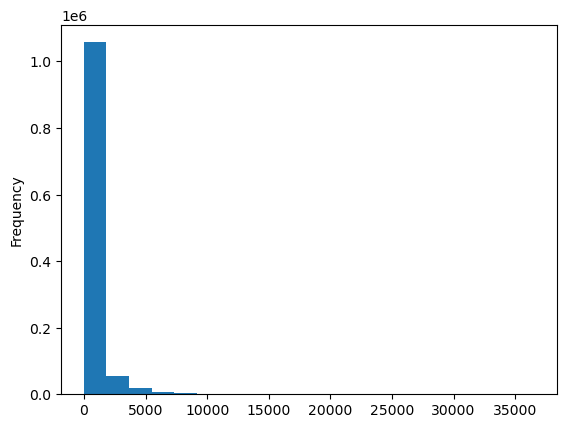

In [77]:
df_timely['sample_size'].plot.hist(bins = 20)

In [78]:
#making an outliers subset df of sample_size > 1.5(IQR)
df_outliers = df_timely.loc[df_timely['sample_size'] > 723]

In [79]:
#examining outlier basic statistics
df_outliers.describe()

,year,sample_size,data_value
count,219681.000000,219681.000000,219681.000000
mean,2017.902677,2260.076475,64.148743
std,2.015785,2104.887797,27.933006
min,2015.000000,724.000000,0.800000
25%,2016.000000,1021.000000,38.200000
50%,2018.000000,1536.000000,71.600000
75%,2020.000000,2643.000000,89.500000
max,2021.000000,36593.000000,100.000000


In [80]:
#making an inliers subset df of sample_size < 1.5(IQR)
df_inliers = df_timely.loc[df_timely['sample_size'] <= 723]

In [81]:
#examining inlier basic statistics
df_inliers.describe()

,year,sample_size,data_value
count,926856.000000,926856.000000,673790.000000
mean,2018.054044,151.745937,28.038741
std,2.027890,179.677670,27.089999
min,2015.000000,0.000000,0.000000
25%,2016.000000,17.000000,7.600000
50%,2018.000000,73.000000,17.000000
75%,2020.000000,229.000000,39.600000
max,2021.000000,723.000000,100.000000


<AxesSubplot:ylabel='Frequency'>

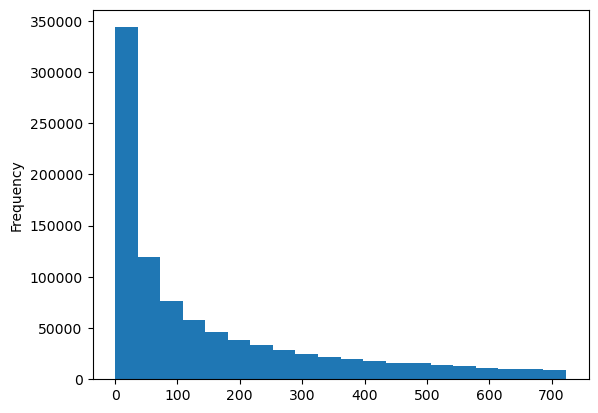

In [82]:
df_inliers['sample_size'].plot.hist(bins = 20)

<div class='alert alert-block alert-success'>
Conclusion: 219,681 sample_sizes are more than 1.5(IQR). Though they could technically qualify as outliers, due to the nature of the survey questionaire that informed the dataset there's no good evidence to support excluding them.
    </div>

## 5. Missing values checks

In [83]:
#Checking variables for missing data

df_timely.isnull().sum()

year                         0
sample_size                  0
data_value              253066
class_id                     0
topic_id                     0
location_id                  0
breakout_id                  0
breakout_category_id         0
question_id                  0
response_id                  0
dtype: int64

In [84]:
#Looking into missing data_values

df_null = df_timely.loc[df_timely['data_value'].isnull()]
df_null.describe()

,year,sample_size,data_value
count,253066.000000,253066.000000,0.0
mean,2018.034347,7.992717,NaN
std,2.041077,8.326717,NaN
min,2015.000000,0.000000,NaN
25%,2016.000000,2.000000,NaN
50%,2018.000000,6.000000,NaN
75%,2020.000000,12.000000,NaN
max,2021.000000,210.000000,NaN


In [85]:
df_null['breakout_id'].value_counts()

RACE05      41000
RACE06      34579
RACE04      26147
RACE03      25457
RACE07      18459
RACE02      13889
RACE08      10151
AGE01        9753
INCOME3      6588
EDUCA1       6415
INCOME1      6248
INCOME4      6088
AGE02        5386
AGE09        5193
AGE03        4965
AGE05        4542
INCOME2      4471
AGE04        4391
INCOME5b     4373
EDUCA4       2464
EDUCA3       2417
INCOME5      2240
EDUCA2       2234
SEX2         1869
SEX1         1595
RACE01       1552
BO1           597
AGE11           2
AGE10           1
Name: breakout_id, dtype: int64

In [86]:
df_null['breakout_category_id'].value_counts()

CAT4    171234
CAT3     34233
CAT6     30008
CAT5     13530
CAT2      3464
CAT1       597
Name: breakout_category_id, dtype: int64

<div class='alert alert-block alert-info'>
Notes: 253,066 NaN values in data_value; no NaN values in other variables. The NaNs seem to be primarily in CAT4 "Race/Ethnicity". Missing values will be left as-is for now and addressed in the analyses for each category.
    </div>

## 6. Duplicate values checks

In [87]:
#Checking duplicates count

df_timely.duplicated().sum()

154

In [88]:
#Exploring duplicated values

df_dups = df_timely[df_timely.duplicated()]
df_dups

,year,sample_size,data_value,class_id,topic_id,location_id,breakout_id,breakout_category_id,question_id,response_id
2062814,2021,3,NaN,CLASS07,TOPIC36,2,INCOME5b,CAT6,CHECKUP1,RESP067
2064279,2021,0,NaN,CLASS05,TOPIC48,2,INCOME5b,CAT6,RACE8,RESP198
2071930,2021,1,NaN,CLASS05,TOPIC22,5,INCOME5b,CAT6,EMPLOY1,RESP027
2075091,2021,6,NaN,CLASS05,TOPIC22,6,INCOME5b,CAT6,EMPLOY1,RESP032
2076340,2021,0,NaN,CLASS05,TOPIC48,5,INCOME5b,CAT6,RACE8,RESP198
2077026,2021,0,NaN,CLASS05,TOPIC48,5,INCOME5b,CAT6,RACE8,RESP198
2077044,2021,6,NaN,CLASS05,TOPIC39,8,INCOME5b,CAT6,_CHLDCNT,RESP090
2077731,2021,12,NaN,CLASS05,TOPIC39,5,INCOME5b,CAT6,_CHLDCNT,RESP091
2087482,2021,2,NaN,CLASS05,TOPIC48,11,INCOME5b,CAT6,RACE8,RESP196
2087701,2021,1,NaN,CLASS07,TOPIC36,10,INCOME5b,CAT6,CHECKUP1,RESP067


In [89]:
df_timely.drop_duplicates(inplace=True)

C:\Users\theva\AppData\Local\Temp\ipykernel_12960\2496281827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timely.drop_duplicates(inplace=True)


<div class='alert alert-block alert-info'>
Notes: 154 duplicates. All duplicates are of small sample sizes and will be dropped in the sample size check.
    </div>

# 7. Questions check
Dropping questions that were deemed irrelevant to this analysis.

In [95]:
#List of question_ids to keep

keepers = ['_DRNKDRV',
    '_RFBING5',
    '_RFDRHV7',
    'DRNKANY5',
    'AGE',
    'RACE8',
    'SEX',
    'INCOME',
    'EDUCA',
    '_FRTLT1A',
    '_VEGLT1A',
    'MARITAL',
    'INTERNET',
    '_BMI5CAT',
    'GENHLTH',
    '_RFHLTH',
    'CHECKUP1',
    '_MENT14D',
    'DECIDE',
    '_TOTINDA',
    '_PAINDX2',
    '_PASTAE2',
    '_PASTRNG',
    'USENOW3',
    '_SMOKER3',
    '_RFSMOK3',
    '_ECIGSTS',
    '_CURECIG',
    'ECIGNOW1',
    '_PNEUMO3',
    '_FLSHOT7'
 ]

In [96]:
#populating new dataframe of relevant questions

df_good_qs = df_timely.loc[df_timely['question_id'].isin(keepers)]

In [97]:
#checking dataframe

df_good_qs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727716 entries, 11 to 2289900
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  727716 non-null  int64  
 1   sample_size           727716 non-null  int64  
 2   data_value            566002 non-null  float64
 3   class_id              727716 non-null  object 
 4   topic_id              727716 non-null  object 
 5   location_id           727716 non-null  object 
 6   breakout_id           727716 non-null  object 
 7   breakout_category_id  727716 non-null  object 
 8   question_id           727716 non-null  object 
 9   response_id           727716 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 61.1+ MB


In [98]:
#checking dataframe

df_good_qs.head(200)

,year,sample_size,data_value,class_id,topic_id,location_id,breakout_id,breakout_category_id,question_id,response_id
11,2019,1235,76.5,CLASS07,TOPIC36,20,AGE04,CAT3,CHECKUP1,RESP063
18,2020,34,2.0,CLASS05,TOPIC48,1,EDUCA3,CAT5,RACE8,RESP200
19,2020,401,47.5,CLASS05,TOPIC51,1,AGE05,CAT3,SEX,RESP001
26,2019,52,4.3,CLASS17,TOPIC54,20,AGE02,CAT3,USENOW3,RESP079
28,2019,17,0.4,CLASS17,TOPIC54,20,SEX2,CAT2,USENOW3,RESP080
29,2019,2150,54.3,CLASS17,TOPIC55,20,AGE09,CAT3,_SMOKER3,RESP071
30,2019,223,57.6,CLASS17,TOPIC55,20,RACE02,CAT4,_SMOKER3,RESP071
44,2019,106,12.2,CLASS05,TOPIC33,21,AGE04,CAT3,INCOME,RESP016
46,2019,86,12.8,CLASS05,TOPIC33,21,AGE03,CAT3,INCOME,RESP019
47,2019,680,39.2,CLASS05,TOPIC33,21,AGE09,CAT3,INCOME,RESP020


<div class='alert alert-block alert-info'>
Note: Dropped 418,667 rows<br>
Current size: 727,716 rows and 10 columns
    </div>

## 8. Export

In [99]:
#Exporting cleaned dataset

df_good_qs.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'BRFSS CLEANED.pkl'))